In [1]:
import pandas as pd
df = pd.read_csv("../../Data/embedding_matrix_1025_famo.csv",index_col=0)

In [2]:
import pandas as pd
import scipy.stats as stats

# Step 1: Convert non-zero values to 1, keep 0 as is
df_binary = df.copy()
node_columns = [col for col in df.columns if col not in ['SFARI ID', 'Repository Id','Role','ASD']]  # Assuming all columns except 'Role' are node columns
df_binary[node_columns] = (df_binary[node_columns] > 0).astype(int)  # Convert to binary (0 or 1)

# Step 2: Calculate odds ratio for each node
odds_ratios = {}

for node in node_columns:
    # Create a contingency table for 'fa' and 'mo'
    contingency_table = pd.crosstab(df_binary['Role'], df_binary[node])

    # Check if the table has both 0 and 1 for both 'fa' and 'mo'
    if contingency_table.shape == (2, 2):
        # Calculate the odds ratio
        odds_ratio, p_value = stats.fisher_exact(contingency_table)
        odds_ratios[node] = odds_ratio
    else:
        # Skip nodes where the contingency table is not 2x2
        #print(f"Skipping node {node} due to incomplete contingency table")
        odds_ratios[node] = None  # Or handle however you'd prefer

# Display the odds ratios
odds_ratios_df = pd.DataFrame(list(odds_ratios.items()), columns=['Node', 'Odds Ratio'])
print(odds_ratios_df)


                    Node  Odds Ratio
0      ENSG00000223764.2         inf
1     ENSG00000187634.12         inf
2     ENSG00000188976.11    1.133887
3     ENSG00000187961.14         inf
4      ENSG00000215790.7         inf
...                  ...         ...
2589  ENSG00000169057.23         inf
2590  ENSG00000007350.17         inf
2591  ENSG00000196924.18         inf
2592  ENSG00000013563.14         inf
2593  ENSG00000160211.19         inf

[2594 rows x 2 columns]


In [3]:
pd.crosstab(df_binary['Role'], df_binary[node])

ENSG00000160211.19,0,1
Role,,
fa,2,748
mo,0,761


In [4]:
node = node_columns[1]
print(df_binary[node].unique())

[1 0]


In [8]:
sum(odds_ratios_df['Odds Ratio'] == np.inf)

1992

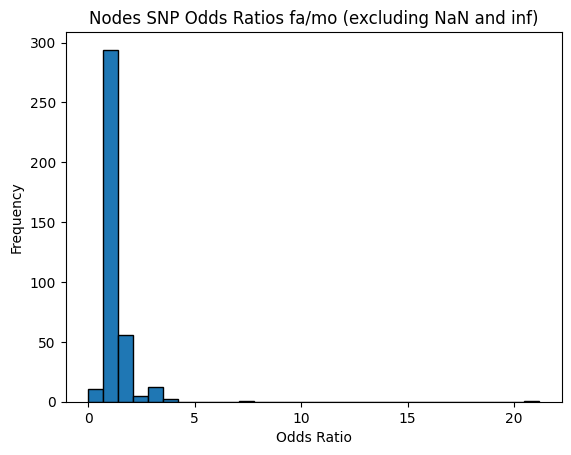

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Filter out NaN and infinite values
filtered_odds_ratios = odds_ratios_df['Odds Ratio'].replace([np.inf, -np.inf], np.nan).dropna()

# Plot the histogram
plt.hist(filtered_odds_ratios, bins=30, edgecolor='black')
plt.xlabel('Odds Ratio')
plt.ylabel('Frequency')
plt.title('Nodes SNP Odds Ratios fa/mo (excluding NaN and inf)')
plt.show()


# mo / fa

In [15]:
import pandas as pd
import scipy.stats as stats
import numpy as np

# Step 1: Convert non-zero values to 1, keep 0 as is
df_binary = df.copy()
node_columns = [col for col in df.columns if col not in ['SFARI ID', 'Repository Id','Role','ASD']]  # Assuming all columns except 'Role' are node columns
df_binary[node_columns] = (df_binary[node_columns] > 0).astype(int)  # Convert to binary (0 or 1)

# Step 2: Calculate odds ratio for each node
odds_ratios = {}

for node in node_columns:
    # Create a contingency table for 'fa' and 'mo'
    contingency_table = pd.crosstab(df_binary['Role'], df_binary[node])

    # Check if the table has both 0 and 1 for both 'fa' and 'mo'
    if contingency_table.shape == (2, 2):
        # Calculate the odds ratio (mo/fa)
        odds_ratio, p_value = stats.fisher_exact(contingency_table, alternative='two-sided')
        
        # Avoid division by zero
        if odds_ratio == 0:
            odds_ratios[node] = np.inf  # Assign infinity if odds_ratio is zero
        else:
            odds_ratios[node] = 1 / odds_ratio  # This gives you mo/fa
    else:
        # Skip nodes where the contingency table is not 2x2
        odds_ratios[node] = None  # Or handle however you'd prefer

# Display the odds ratios
odds_ratios_df = pd.DataFrame(list(odds_ratios.items()), columns=['Node', 'Odds Ratio (mo/fa)'])
print(odds_ratios_df)


                    Node  Odds Ratio (mo/fa)
0      ENSG00000223764.2            0.000000
1     ENSG00000187634.12            0.000000
2     ENSG00000188976.11            0.881922
3     ENSG00000187961.14            0.000000
4      ENSG00000215790.7            0.000000
...                  ...                 ...
2589  ENSG00000169057.23            0.000000
2590  ENSG00000007350.17            0.000000
2591  ENSG00000196924.18            0.000000
2592  ENSG00000013563.14            0.000000
2593  ENSG00000160211.19            0.000000

[2594 rows x 2 columns]


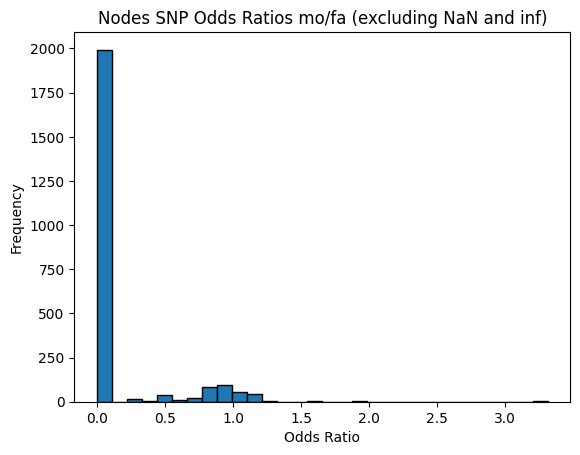

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Filter out NaN and infinite values
filtered_odds_ratios = odds_ratios_df['Odds Ratio (mo/fa)'].replace([np.inf, -np.inf], np.nan).dropna()

# Plot the histogram
plt.hist(filtered_odds_ratios, bins=30, edgecolor='black')
plt.xlabel('Odds Ratio')
plt.ylabel('Frequency')
plt.title('Nodes SNP Odds Ratios mo/fa (excluding NaN and inf)')
plt.show()


In [17]:
odds_ratios_df[(odds_ratios_df['Odds Ratio (mo/fa)'] > 2) & (odds_ratios_df['Odds Ratio (mo/fa)'] < 10)]

,Node,Odds Ratio (mo/fa)
1376,ENSG00000166352.16,3.315579
2141,ENSG00000215474.7,3.315579
